In [271]:
import pickle as pkl
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
import itertools


In [286]:
save_path = "./visulizations/Synth_mask_networks_2_dynmask.pkl"
with open(save_path, "rb") as file:
        masks = pkl.load(file)[0:3]
scaler = MinMaxScaler()
masks_nomralized = minmax_scale(masks.reshape(masks.shape[0],-1),axis=1)
masks_nomralized = masks_nomralized.reshape(masks.shape)
#masks_nomralized[masks_nomralized<0.2]=0
mean_mask = minmax_scale(masks_nomralized.mean(0))
#mean_mask[mean_mask<0.6] = 0

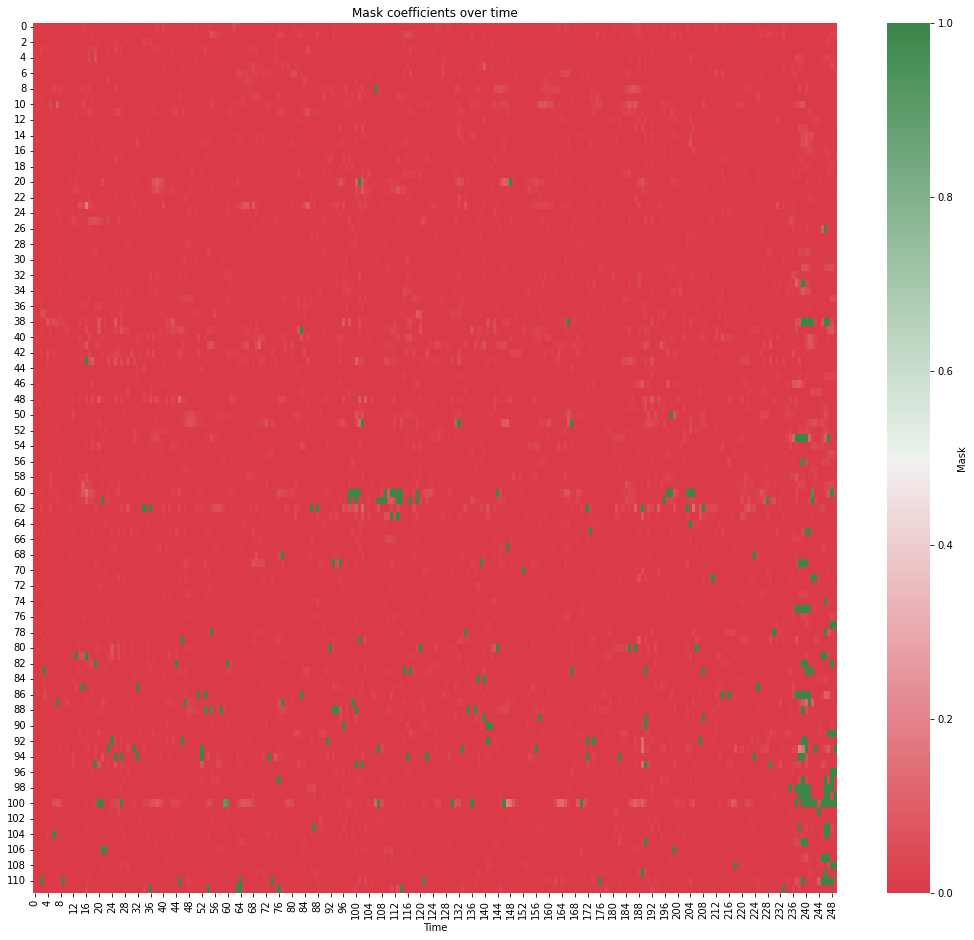

In [288]:
figure = plt.figure(figsize=(18,16))
df = pd.DataFrame(data=masks[0], index=np.arange(0,112), columns=np.arange(0,250))
# Generate heatmap plot
color_map = sns.diverging_palette(10, 133, as_cmap=True)
heat_map = sns.heatmap(data=df, cmap=color_map, cbar_kws={"label": "Mask"}, vmin=0, vmax=1)
plt.xlabel("Time")
#plt.yticks(range(len(regions[new_indicies])), regions[new_indicies], size='small', rotation='horizontal')
plt.title("Mask coefficients over time")
#plt.show()
plt.savefig('multivariate_vis.png')

In [5]:
save_path = "./visulizations/fo_saliency_0.pkl"
with open(save_path, "rb") as file:
        masks = pkl.load(file)


In [7]:
from nilearn import datasets

dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm', symmetric_split= True)
labels_cor = dataset.labels[1:]
dataset = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr25-2mm', symmetric_split= True)
ho_sub = dataset.maps
labels_sub = dataset.labels[1:]

regions = np.array(labels_cor+labels_sub)



In [35]:
n = list(networks.item().values())
new_indicies = list(itertools.chain(*n))
masks_nomralized[0][new_indicies].shape


(81, 200)

In [37]:
st_ind = 0
mask = np.zeros(len(new_indicies))
for i, network in enumerate(networks.item()):
    n_regions = len(networks.item()[network])
    mask[st_ind:st_ind+n_regions] = i
    st_ind = st_ind+n_regions

In [38]:
mask

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 3., 3., 3.,
       3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [60]:
networks

{'Visual': [44,
  45,
  46,
  47,
  62,
  63,
  68,
  70,
  71,
  76,
  77,
  78,
  79,
  92,
  93,
  94,
  95],
 'Somatomotor': [12, 13, 18, 32, 33, 82, 83, 88, 89, 90, 91],
 'Dorsal Attention': [24, 30, 34],
 'Ventral Attention': [2, 3, 80, 81],
 'Limbic': [14, 26, 27, 49, 52, 53, 66, 67, 72, 73, 75],
 'Frotoparital': [6],
 'Default': [9, 16, 17, 20, 21, 22, 23, 40, 41, 55, 59, 69],
 'Subcortical': [96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117]}